In [1]:
import tweepy, re
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords



In [2]:
consumerKey = 'x2MdSLGUPi4Ya16ugbRo731dI'
consumerSecret = 'qS5xLj43Ua1t0uAhEPw6ePRbPWmVm4LH9EHg7K0i60azV4TleF'
accessToken ='1217144583156457472-HaIweQCL457klfi5VIGs4uGVgHaocF'
accessTokenSecret = 'ehl7ouPSiDChvrKS59944ZBO25Vl9sqi0jJLPBucavR8Y'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken , accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#input for term to be search and how many tweets to search

searchTerm = input("enter the kerword to search about: ")
NoOfTerms = int(input("enter how many tweets to search: "))

tweets = []
tweetText = []
#search for tweets
tweets = tweepy.Cursor(api.search, q = searchTerm+" -filter:retweets", lang="en").items(NoOfTerms)

enter the kerword to search about: bill gates
enter how many tweets to search: 10


In [4]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,@SpearsDwayne @waitina7 @kzshabazz even micros...
1,How this woman can sit there with her mate Bil...
2,@oyinlad @theonly1acre Nope. Was Dangote’s dau...
3,System is unfair and the rich take advantage o...
4,at the beginning of this November (flu season)...
5,@agoodsamaritan2 @MrMenApocalypse @AnitaBart4 ...
6,How do I report this to Bill Gates? #Depopulat...
7,@thehill In the industry of the United States ...
8,@elcine19 @jdawsey1 I'm following the science....
9,**WTF!! How'd People Miss THIS During Bill Gat...


In [5]:
tweet_df.shape

(10, 1)

# cleaning data

In [6]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)"," ",text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [7]:
tweet_df.head()

,0,cleaned_data
0,@SpearsDwayne @waitina7 @kzshabazz even micros...,even microsoft bill gates amp microsoft got ri...
1,How this woman can sit there with her mate Bil...,How this woman can sit there with her mate Bil...
2,@oyinlad @theonly1acre Nope. Was Dangote’s dau...,Nope Was Dangote s daughter s wedding Bill Gat...
3,System is unfair and the rich take advantage o...,System is unfair and the rich take advantage o...
4,at the beginning of this November (flu season)...,at the beginning of this November flu season B...


In [8]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d',i):
            list_text_new.append(i)
    return ''.join(list_text_new)
tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [9]:
tweet_df.head()

,0,cleaned_data
0,@SpearsDwayne @waitina7 @kzshabazz even micros...,even microsoft bill gates amp microsoft got ri...
1,How this woman can sit there with her mate Bil...,How this woman can sit there with her mate Bil...
2,@oyinlad @theonly1acre Nope. Was Dangote’s dau...,Nope Was Dangote s daughter s wedding Bill Gat...
3,System is unfair and the rich take advantage o...,System is unfair and the rich take advantage o...
4,at the beginning of this November (flu season)...,at the beginning of this November flu season B...


In [10]:
#changing all the words of the reviews column to lowercase letters

def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)
                                                         

In [11]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)
tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [13]:
tweet_df['cleaned_data'].values

array(['even microsoft bill gate amp microsoft got rich mostly from selling their softw',
       'how this woman can sit there with her mate bill gate and talk about welfare and people mental health while ke',
       'nope wa dangote s daughter s wedding bill gate wa in attendance',
       'system is unfair and the rich take advantage of it destroying the system would turn the rich into outcast and tha',
       'at the beginning of this november flu season bill gate will turn year day old amp the church of satan will',
       'regarding example they are everywhere pretty much e',
       'how do i report this to bill gate depopulationagenda',
       'in the industry of the united state of america we have had bill gate state we have to hire out of other',
       'i m following the science you can go ahead ignoring it you re a free to do that a people',
       'wtf how d people miss this during bill gate cnn interview via gate lying a'],
      dtype=object)

In [14]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text
tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [15]:
tweet_df['cleaned_data'].values

array(['even microsoft bill gate amp microsoft got rich mostly selling softw',
       'woman sit mate bill gate talk welfare people mental health ke',
       'nope wa dangote daughter wedding bill gate wa attendance',
       'system unfair rich take advantage destroying system would turn rich outcast tha',
       'beginning november flu season bill gate turn year day old amp church satan',
       'regarding example everywhere pretty much e',
       'report bill gate depopulationagenda',
       'industry united state america bill gate state hire',
       'following science go ahead ignoring free people',
       'wtf people miss bill gate cnn interview via gate lying'],
      dtype=object)

# creating sentiment Analyzer engine

In [16]:
 #calculate the polarity of the reviews

def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "nuetral"
    elif(pol>0 and pol<0.3):
        return "weakly positive"
    elif(pol>0 and pol<=1):
        return "positive"
    elif(pol>0.6 and plo<=1):
        return "strongly positive"
    elif(pol>-0.3 and pol<=0):
        return "weakly negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "negative"
    elif(pol>-1 and pol<=-0.6):
        return "strongly negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)
        

In [17]:
tweet_df['polarity'].value_counts()

weakly positive    4
nuetral            3
positive           1
negative           1
weakly negative    1
Name: polarity, dtype: int64

In [22]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,10):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1

In [23]:
#finding average reaction

polarity = polarity / NoOfTerms
polarity

0.0375

In [26]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [27]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

# visualizing the results


In [28]:
 # printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on bill gates by analyzing 10 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
100.00% people thought it was positive
400.00% people thought it was weakly positive
0.00% people thought it was strongly positive
100.00% people thought it was negative
100.00% people thought it was weakly negative
0.00% people thought it was strongly negative
300.00% people thought it was neutral


In [29]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

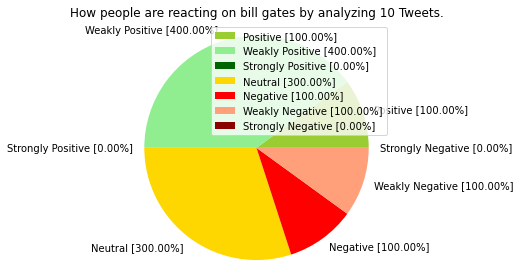

In [30]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()